In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
text = "This module makes available standard errno system symbols. The value of each symbol is the corresponding integer value. The names and descriptions are borrowed from linux/include/errno.h, which should be pretty all-inclusive."

In [4]:
text = text.lower()

In [5]:
sent_tokens = nltk.sent_tokenize(text)
print(sent_tokens)

['this module makes available standard errno system symbols.', 'the value of each symbol is the corresponding integer value.', 'the names and descriptions are borrowed from linux/include/errno.h, which should be pretty all-inclusive.']


In [6]:
word_tokens = nltk.word_tokenize(text)
print(word_tokens)

['this', 'module', 'makes', 'available', 'standard', 'errno', 'system', 'symbols', '.', 'the', 'value', 'of', 'each', 'symbol', 'is', 'the', 'corresponding', 'integer', 'value', '.', 'the', 'names', 'and', 'descriptions', 'are', 'borrowed', 'from', 'linux/include/errno.h', ',', 'which', 'should', 'be', 'pretty', 'all-inclusive', '.']


In [12]:
stopword = stopwords.words("english")
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
word_without_stopword = []
for word in word_tokens:
    if word not in stopword:
       word_without_stopword.append(word)

print(word_without_stopword)

['module', 'makes', 'available', 'standard', 'errno', 'system', 'symbols', '.', 'value', 'symbol', 'corresponding', 'integer', 'value', '.', 'names', 'descriptions', 'borrowed', 'linux/include/errno.h', ',', 'pretty', 'all-inclusive', '.']


In [15]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in word_without_stopword]
print(lemmatized_words)

['module', 'make', 'available', 'standard', 'errno', 'system', 'symbol', '.', 'value', 'symbol', 'corresponding', 'integer', 'value', '.', 'name', 'description', 'borrowed', 'linux/include/errno.h', ',', 'pretty', 'all-inclusive', '.']


In [17]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")
stemmed_words = [stemmer.stem(word) for word in lemmatized_words]
print(stemmed_words)

['modul', 'make', 'avail', 'standard', 'errno', 'system', 'symbol', '.', 'valu', 'symbol', 'correspond', 'integ', 'valu', '.', 'name', 'descript', 'borrow', 'linux/include/errno.h', ',', 'pretti', 'all-inclus', '.']


In [23]:
word_without_punct = []
for word in lemmatized_words:
    if word.isalpha():
        word_without_punct.append(word)
print(word_without_punct)

['module', 'make', 'available', 'standard', 'errno', 'system', 'symbol', 'value', 'symbol', 'corresponding', 'integer', 'value', 'name', 'description', 'borrowed', 'pretty']


In [25]:
tagged_word = nltk.pos_tag(word_without_punct)
print(tagged_word)

[('module', 'NN'), ('make', 'VBP'), ('available', 'JJ'), ('standard', 'NN'), ('errno', 'NN'), ('system', 'NN'), ('symbol', 'NN'), ('value', 'NN'), ('symbol', 'NN'), ('corresponding', 'VBG'), ('integer', 'JJR'), ('value', 'NN'), ('name', 'NN'), ('description', 'NN'), ('borrowed', 'VBD'), ('pretty', 'RB')]


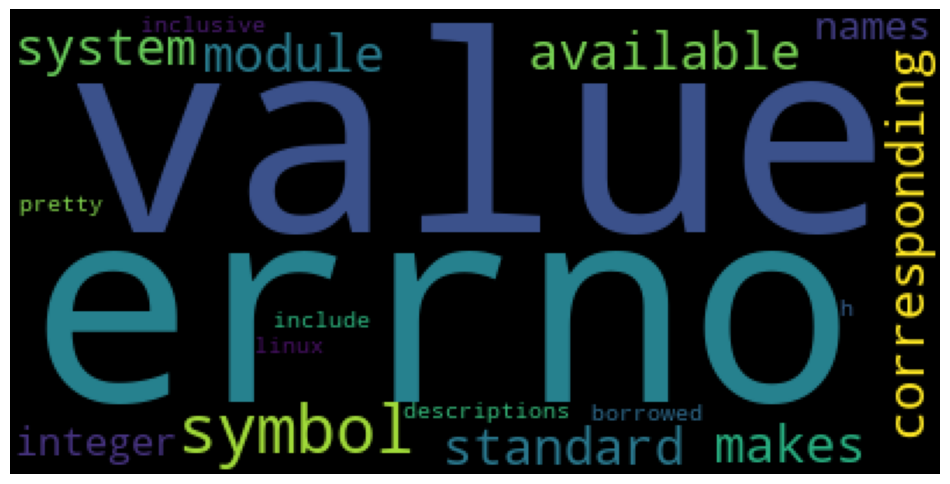

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_ = WordCloud().generate(text)
plt.figure(figsize =(12,12))
plt.imshow(wordcloud_)
plt.axis('off')
plt.show()

In [26]:
import pandas as pd
import numpy as np

In [28]:
corpus = ["satej is my name and i like history",
      "history is very fun and interesting and i like philosophy also",
      "even philosophy is fun and interesting."
]

In [30]:
word_set = set()
for word in corpus:
    word_set = word_set.union(set(word.split(' ')))

print(word_set)

{'like', 'satej', 'interesting.', 'also', 'history', 'is', 'name', 'my', 'philosophy', 'i', 'interesting', 'and', 'very', 'even', 'fun'}


In [31]:
print(len(word_set))

15


In [35]:
print("TF is :")
n_word = len(corpus)
n_word_set = len(word_set)

df_tf = pd.DataFrame(np.zeros((n_word,n_word_set)),columns = list(word_set))

for i in range(n_word):
    word_ = corpus[i].split(' ')
    for w in word_ :
        df_tf[w][i] += 1/len(word_)

df_tf

TF is :


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12244\2374891588.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_tf[w][i] += 1/len(word_)


,like,satej,interesting.,also,history,is,name,my,philosophy,i,interesting,and,very,even,fun
0,0.125000,0.125,0.000000,0.000000,0.125000,0.125000,0.125,0.125,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,0.000000
1,0.090909,0.000,0.000000,0.090909,0.090909,0.090909,0.000,0.000,0.090909,0.090909,0.090909,0.181818,0.090909,0.000000,0.090909
2,0.000000,0.000,0.166667,0.000000,0.000000,0.166667,0.000,0.000,0.166667,0.000000,0.000000,0.166667,0.000000,0.166667,0.166667


In [36]:
print("IDF is :")

idw = {}

for w in word_set:
    k=0
    for i in range(n_word):
        if w in corpus[i].split(' '):
            k+=1
    idw[w] = np.log10(n_word/k)
    print(f"{w:>15}  : {idw[w]:>10}")

IDF is :
           like  : 0.17609125905568124
          satej  : 0.47712125471966244
   interesting.  : 0.47712125471966244
           also  : 0.47712125471966244
        history  : 0.17609125905568124
             is  :        0.0
           name  : 0.47712125471966244
             my  : 0.47712125471966244
     philosophy  : 0.17609125905568124
              i  : 0.17609125905568124
    interesting  : 0.47712125471966244
            and  :        0.0
           very  : 0.47712125471966244
           even  : 0.47712125471966244
            fun  : 0.17609125905568124
